# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup using random library for the last part of assignment 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import random 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
              

              
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#grouping by mouse ID and counting 

mice_id = df.groupby('Mouse ID')
count = mice_id.count()

#gathering timepoints to see if there are any duplicates in the data
timepoints = len(df['Timepoint'].unique())
duplicate = count.loc[count['Timepoint'] > timepoints, ['Timepoint']]

#adding duplicates data info to the orginal dataframe 

duplicate_mouse = pd.merge(duplicate, df, on='Mouse ID')
duplicate_mouse['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicate.index[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# 1 Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# 2 mean, median, variance, standard deviation, and SEM of the tumor volume. 
# 3 Assemble the resulting series into a single summary DataFrame.


#1 

dr_group = clean_df.groupby('Drug Regimen')

#2

mean = dr_group['Tumor Volume (mm3)'].mean()
median = dr_group['Tumor Volume (mm3)'].median()
variance = dr_group['Tumor Volume (mm3)'].var()
std = dr_group['Tumor Volume (mm3)'].std()
sem = dr_group['Tumor Volume (mm3)'].sem()

#3

new_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem,
})

new_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
dr_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

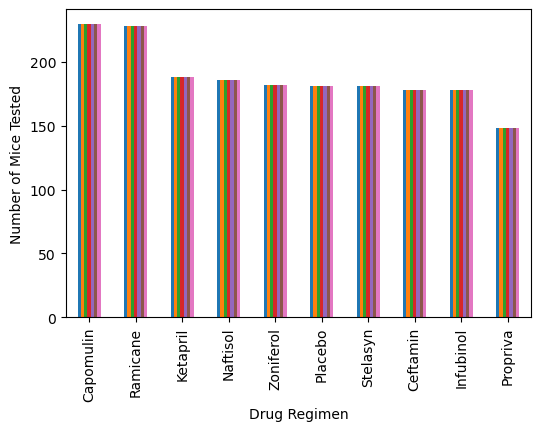

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# getting info for x and y axis 

drug_types = dr_group.count()
mouse_count = drug_types[['Mouse ID']]
sort = drug_types.sort_values(['Mouse ID'], ascending=False)

#creating plot
sort.plot(kind='bar', figsize=(6, 4), legend=False,)

plt.ylabel('Number of Mice Tested')
plt.xlabel ('Drug Regimen')
plt.show()

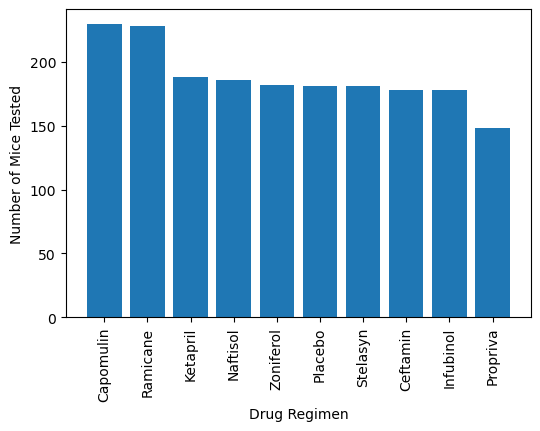

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(6, 4))
plt.bar(sort.index, sort['Mouse ID'])
        

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation='vertical')
plt.show()

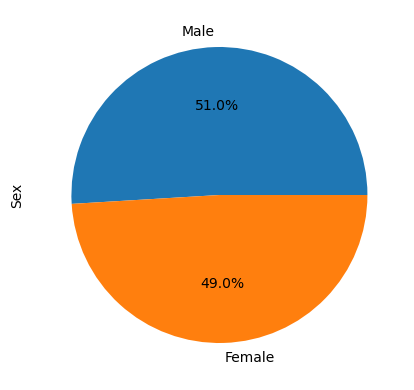

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_df.groupby(['Sex'])
mouse_genders= mouse_gender['Sex'].count()
mouse_gender_pie = mouse_genders.sort_values(ascending=False)


mouse_gender_pie.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 4),)
plt.tight_layout()

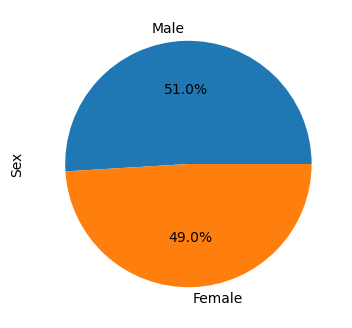

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(6, 4))

plt.pie(mouse_gender_pie, labels=mouse_gender_pie.index, autopct="%1.1f%%")


plt.ylabel(mouse_gender_pie.index.name)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

new_mice = clean_df.groupby('Mouse ID')
greatest_tp = new_mice['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new2_df = pd.merge(greatest_tp, clean_df, on=['Mouse ID', 'Timepoint'])
group_df = new2_df.sort_values(['Drug Regimen']).reset_index(drop=True)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drugt= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in range (len(drugt)):

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = new2_df.loc[new2_df["Drug Regimen"]==drugt[i], ['Tumor Volume (mm3)']]
    
    # add subset 
    tumor_vol_data.append(tumors['Tumor Volume (mm3)'])                                                                  
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data[i].quantile([.25, .5, .75])
    lowrq = quartiles[.25]
    upprq = quartiles[.75]
    iqr = upprq - lowrq
    lwr_bnd = lowrq - (1.5 * iqr)
    upr_bnd = upprq + (1.5 * iqr)  
   
 #displaying outliers                                                             
outliers = tumor_vol_data[i].loc[(tumor_vol_data[i] < lwr_bnd) | (tumor_vol_data[i] > upr_bnd)]
print(f"{drugt[i]}'s potential outliers: {outliers}")                                                              
                                                              
    

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


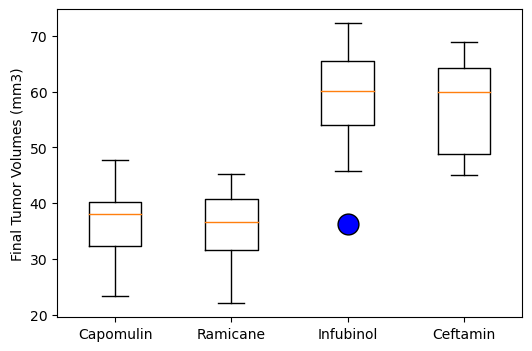

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(6, 4))
position = np.arange(len(tumor_vol_data)) + 1
boxp = plt.boxplot(tumor_vol_data, positions=position, labels=drugt)


plt.setp(boxp['fliers'], markerfacecolor='blue', markersize=15)
plt.ylabel('Final Tumor Volumes (mm3)')
plt.show()

## Line and Scatter Plots

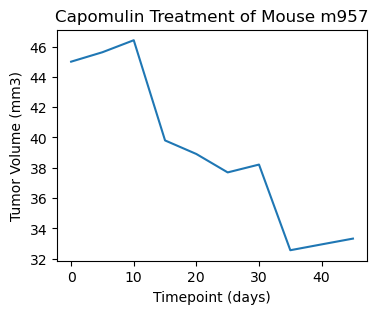

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


cap_mouse = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
mouse_sample = cap_mouse['Mouse ID'].unique()

# Pick a random mouse from the above list
mouse_random = np.random.choice(mouse_sample)
mouse_result = clean_df.loc[clean_df['Mouse ID'] == mouse_random, :]

# Plot results for tumor volume vs time points for random mouse
plt.figure(figsize=(4, 3))
plt.plot(mouse_result['Timepoint'], mouse_result['Tumor Volume (mm3)'])

# Add labels to graph
plt.title(mouse_result.iloc[0, 4] + ' Treatment of Mouse ' + mouse_result.iloc[0, 0])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


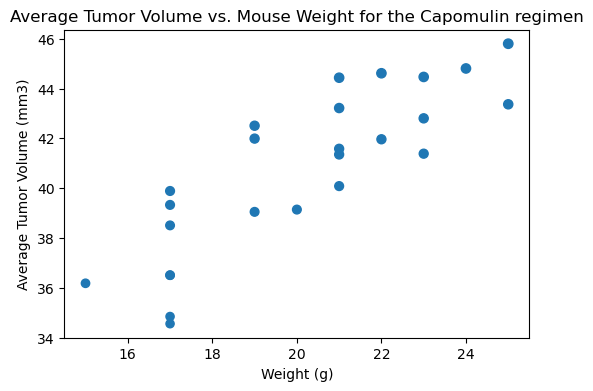

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe with mouse/ tumor volume averages
mt_df = cap_mouse.groupby('Mouse ID')
av_tv_mw = mt_df.mean()

# Graph scatterplot of weight vs ave. tumor volume (and make it pretty colors)
plt.figure(figsize=(6, 4))
plt.scatter(av_tv_mw['Weight (g)'], av_tv_mw['Tumor Volume (mm3)'], av_tv_mw['Tumor Volume (mm3)'])

# Add labels to graph
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

